<a href="https://www.kaggle.com/code/vijays140291/oscillation-prediction?scriptVersionId=194564987" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#importing library
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/kaggle/input/oscillator/Valeur_Flottante_QV1.csv')
df

,Cycle Cumulé,Valeur suivante,Valeur flottante
0,0,2,2
1,2,9,11
2,11,-13,-4
3,-2,4,-9
4,2,12,16
...,...,...,...
2523,0,0,3
2524,0,-1,-1
2525,-1,4,3
2526,3,-11,-7


<Axes: >

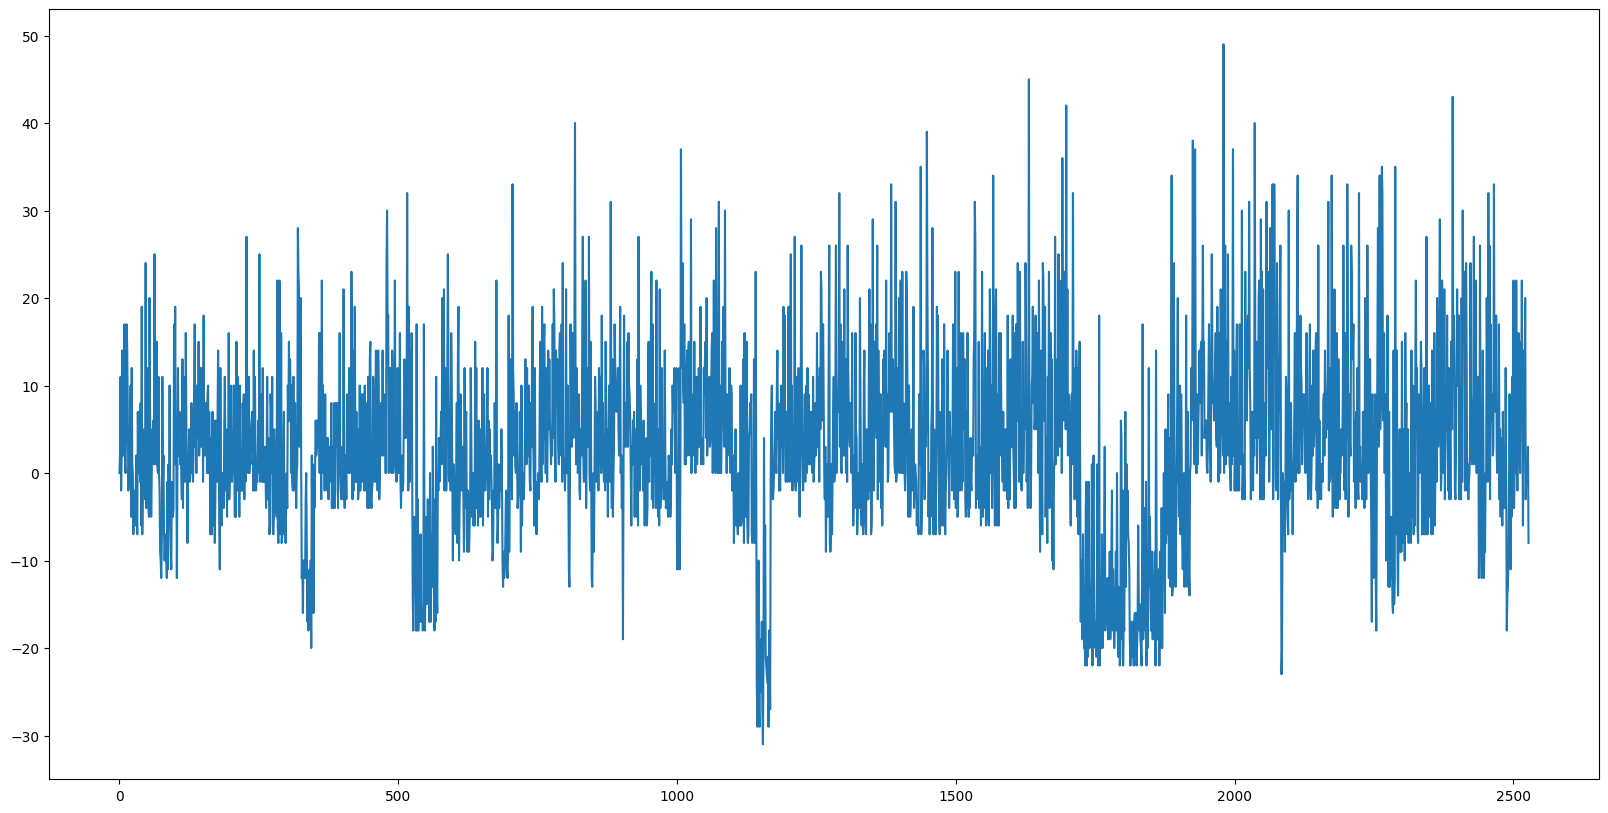

In [3]:
df['Cycle Cumulé'].plot(kind='line',figsize=(20,10))

<Axes: >

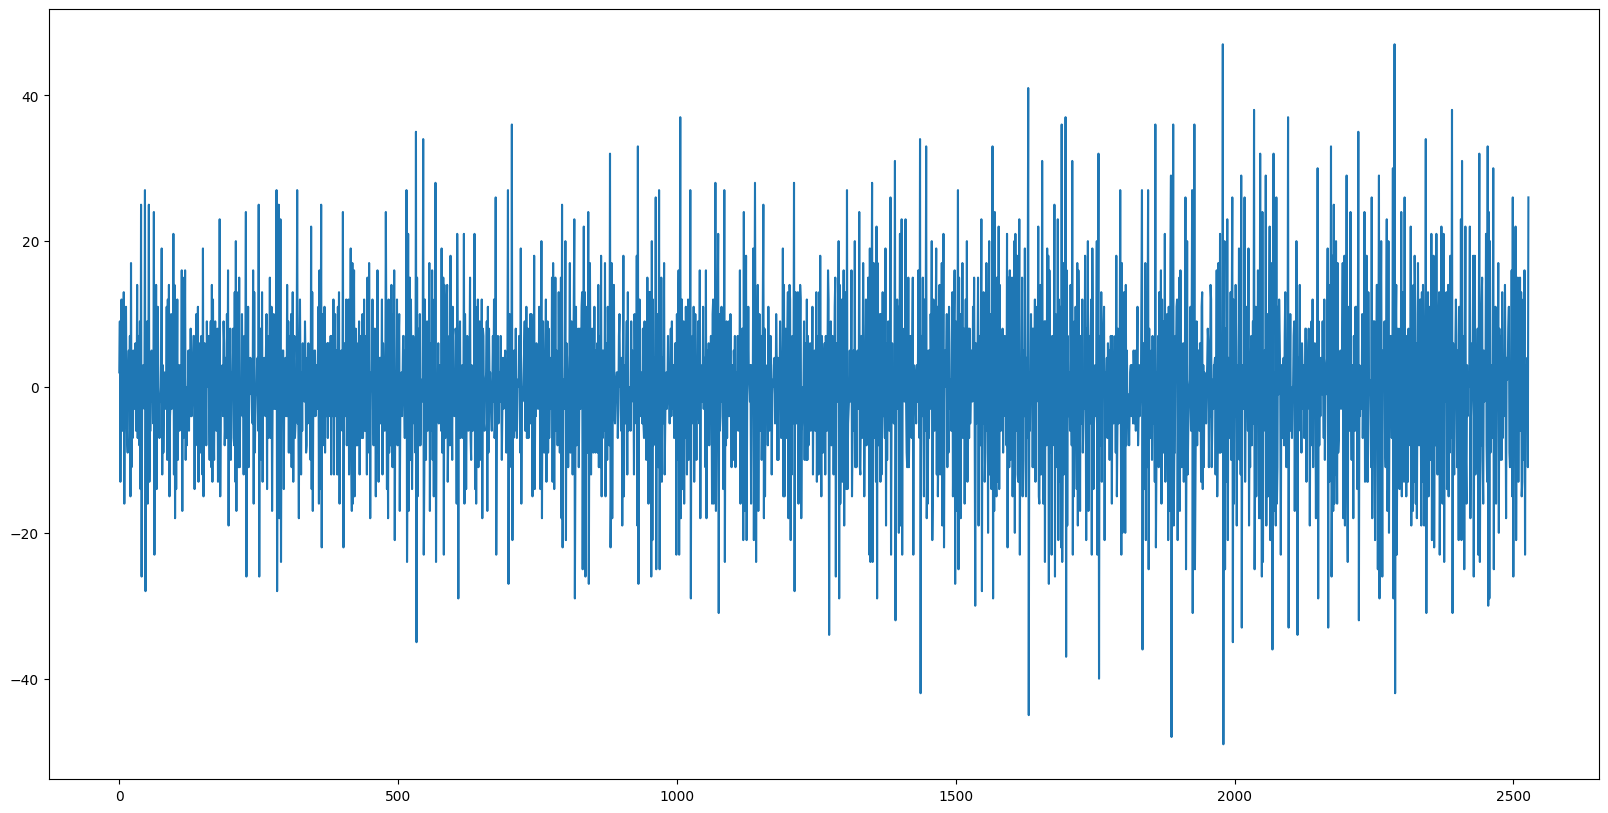

In [4]:
df['Valeur suivante'].plot(kind='line',figsize=(20,10))

In [10]:
x

,Cycle Cumulé,Valeur suivante
0,0,2
1,2,9
2,11,-13
3,-2,4
4,2,12
...,...,...
2523,0,0
2524,0,-1
2525,-1,4
2526,3,-11


In [11]:
y

0        2
1       11
2       -4
3       -9
4       16
        ..
2523     3
2524    -1
2525     3
2526    -7
2527    15
Name: Valeur flottante, Length: 2528, dtype: int64

# Before Adding Features

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=122)
scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)

# Before hypertuning

In [13]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.3131957184557088

# Result

# After hypertuning

In [14]:
model = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.3932311738777672

In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor



model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],    # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')


grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print(f"Test Score (R^2): {test_score:.4f}")


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Test Score (R^2): 0.3967


# After adding new Features

In [87]:
df_new=df.copy()
df_new['Cycle greater or less']=df_new['Cycle Cumulé'].apply(lambda x:1 if x>0 else 0)
df_new['Valeur greater or less']=df_new['Valeur flottante'].apply(lambda x:1 if x>0 else 0)
df_new

,Cycle Cumulé,Valeur suivante,Valeur flottante,Cycle greater or less,Valeur greater or less
0,0,2,2,0,1
1,2,9,11,1,1
2,11,-13,-4,1,0
3,-2,4,-9,0,0
4,2,12,16,1,1
...,...,...,...,...,...
2523,0,0,3,0,1
2524,0,-1,-1,0,0
2525,-1,4,3,0,1
2526,3,-11,-7,1,0


In [88]:

df_new['Cycle_Moving Average'] = df_new['Cycle Cumulé'].rolling(window=2).mean()

df_new['Cycle_Cumulative Deviation'] = (df_new['Cycle Cumulé'] - df_new['Cycle Cumulé'].mean()).cumsum()
df_new['Valeur_Moving Average'] = df_new['Valeur flottante'].rolling(window=2).mean()

df_new['Valeur_Cumulative Deviation'] = (df_new['Valeur flottante'] - df_new['Valeur flottante'].mean()).cumsum()


In [89]:
df_new

,Cycle Cumulé,Valeur suivante,Valeur flottante,Cycle greater or less,Valeur greater or less,Cycle_Moving Average,Cycle_Cumulative Deviation,Valeur_Moving Average,Valeur_Cumulative Deviation
0,0,2,2,0,1,NaN,-3.047073e+00,NaN,1.993671e+00
1,2,9,11,1,1,1.0,-4.094146e+00,6.5,1.298734e+01
2,11,-13,-4,1,0,6.5,3.858782e+00,3.5,8.981013e+00
3,-2,4,-9,0,0,4.5,-1.188291e+00,-6.5,-2.531646e-02
4,2,12,16,1,1,0.0,-2.235364e+00,3.5,1.596835e+01
...,...,...,...,...,...,...,...,...,...
2523,0,0,3,0,1,-1.5,1.818829e+01,-8.5,-9.974684e+00
2524,0,-1,-1,0,0,0.0,1.514122e+01,1.0,-1.098101e+01
2525,-1,4,3,0,1,-0.5,1.109415e+01,1.0,-7.987342e+00
2526,3,-11,-7,1,0,1.0,1.104707e+01,-2.0,-1.499367e+01


In [91]:
final_test_set=df_new.tail(1).drop('Valeur flottante',axis=1)

In [92]:
df_new=df_new.drop(index=2527,axis=0)

In [93]:
df_new

,Cycle Cumulé,Valeur suivante,Valeur flottante,Cycle greater or less,Valeur greater or less,Cycle_Moving Average,Cycle_Cumulative Deviation,Valeur_Moving Average,Valeur_Cumulative Deviation
0,0,2,2,0,1,NaN,-3.047073,NaN,1.993671
1,2,9,11,1,1,1.0,-4.094146,6.5,12.987342
2,11,-13,-4,1,0,6.5,3.858782,3.5,8.981013
3,-2,4,-9,0,0,4.5,-1.188291,-6.5,-0.025316
4,2,12,16,1,1,0.0,-2.235364,3.5,15.968354
...,...,...,...,...,...,...,...,...,...
2522,-3,3,-20,0,0,8.5,21.235364,-13.5,-12.968354
2523,0,0,3,0,1,-1.5,18.188291,-8.5,-9.974684
2524,0,-1,-1,0,0,0.0,15.141218,1.0,-10.981013
2525,-1,4,3,0,1,-0.5,11.094146,1.0,-7.987342


In [94]:
df_new.isna().sum()

Cycle Cumulé                   0
Valeur suivante                0
Valeur flottante               0
Cycle greater or less          0
Valeur greater or less         0
Cycle_Moving Average           1
Cycle_Cumulative Deviation     0
Valeur_Moving Average          1
Valeur_Cumulative Deviation    0
dtype: int64

In [95]:
df_new['Cycle_Moving Average']=df_new['Cycle_Moving Average'].fillna(df_new['Cycle_Moving Average'].mean())
df_new['Valeur_Moving Average']=df_new['Valeur_Moving Average'].fillna(df_new['Valeur_Moving Average'].mean())



In [96]:
y_new=df_new['Valeur flottante']
x_new=df_new.drop('Valeur flottante',axis=1)

In [97]:
x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(x_new,y_new,train_size=0.90,random_state=123,shuffle=False)

In [98]:
scaler=StandardScaler()
scaler.fit(x_train_new)
x_train_new=pd.DataFrame(scaler.transform(x_train_new),columns=x_train_new.columns,index=x_train_new.index)
x_test_new=pd.DataFrame(scaler.transform(x_test_new),columns=x_test_new.columns,index=x_test_new.index)
final_test_set=pd.DataFrame(scaler.transform(final_test_set),columns=final_test_set.columns,index=final_test_set.index)

In [99]:
final_test_set

,Cycle Cumulé,Valeur suivante,Cycle greater or less,Valeur greater or less,Cycle_Moving Average,Cycle_Cumulative Deviation,Valeur_Moving Average,Valeur_Cumulative Deviation
2527,-1.031792,2.171119,-1.132754,1.038562,-0.624974,0.862199,0.469916,-0.164881


# Result

In [85]:
model_new = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=100)
model_new.fit(x_train_new,y_train_new)
model_new.score(x_test_new,y_test_new)

0.8987707959070605

In [86]:
y_test_new

2274     6
2275   -31
2276     6
2277     0
2278   -18
        ..
2522   -20
2523     3
2524    -1
2525     3
2526    -7
Name: Valeur flottante, Length: 253, dtype: int64

In [26]:
y_pred=model_new.predict(x_test_new)

# Root Mean Square Error

In [27]:
np.sqrt(np.mean((y_pred-y_test_new)**2))

4.508494932079358

# XGBOOST REGRESSOR

In [100]:
import xgboost as xgb

model = xgb.XGBRegressor(
    objective='reg:squarederror',  # For regression tasks
    n_estimators=10000,
    learning_rate=0.01,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=50
)

model.fit(x_train_new, y_train_new,
          eval_set=[(x_test_new, y_test_new)],
          
          verbose=False)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [101]:
y_pred = model.predict(x_test_new)

In [102]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test_new, y_pred, squared=False)
print(f'RMSE: {rmse}')


RMSE: 2.594345291287176


In [103]:
model.score(x_test_new,y_test_new)

0.9664842577698209

In [104]:
model.predict(final_test_set)

array([16.439215], dtype=float32)

# Actual Value is 15 and predicted value is 16.43

In [106]:
model.predict(x_test_new)

array([  9.663485  , -26.897335  ,   8.997832  ,  -4.404941  ,
       -13.287437  ,   0.39307207,   6.0444226 ,   4.2759633 ,
        -8.2177105 , -10.539584  ,  25.295607  ,   4.269794  ,
       -23.022886  ,  36.58871   ,  10.649624  , -23.945795  ,
        15.056153  ,  -4.4011054 , -26.987272  ,   2.5546687 ,
         6.827576  ,   7.7520328 ,  -7.8840084 ,  -7.6211843 ,
        -3.611585  ,  15.959743  ,   6.5411415 , -17.61062   ,
         3.9806805 ,   8.97581   , -11.323304  ,  14.296903  ,
         9.40817   ,  -4.938647  , -11.10185   ,  -9.68896   ,
         6.8974595 ,  -5.649607  ,  -7.8563366 ,   1.913723  ,
        -2.206965  ,  -5.05103   ,  14.574885  ,   2.839386  ,
        -5.0868306 ,  13.017818  , -12.59321   ,  -6.227601  ,
        -0.39554197,   7.3951783 ,  24.538767  ,  -4.699198  ,
       -10.356385  , -13.660633  , -20.89736   ,   9.699311  ,
        15.383543  ,  -7.462601  ,  -4.954356  ,  13.779693  ,
         9.677805  , -21.821896  ,  -6.1585336 ,  -1.61

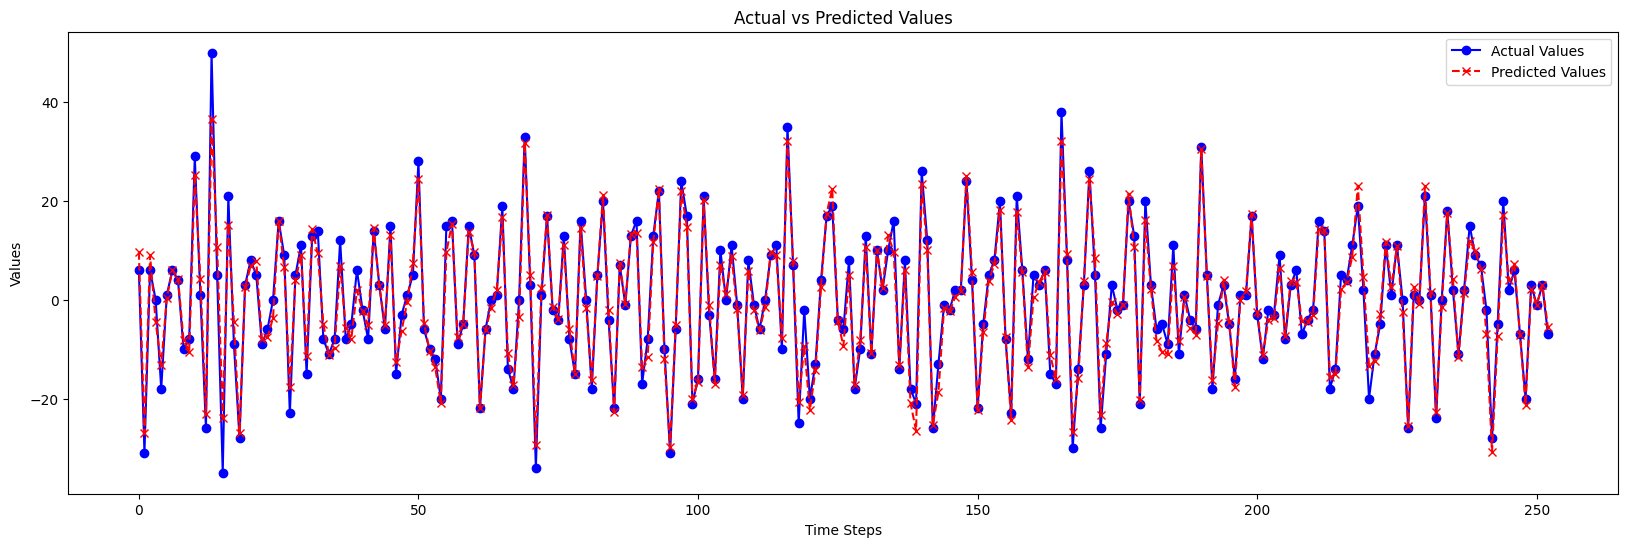

In [107]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(20, 6))

# Plot the actual values
plt.plot(y_test_new.reset_index(drop=True), label='Actual Values', color='blue', linestyle='-', marker='o')

# Plot the predicted values
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='--', marker='x')

# Add labels and title
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')

# Show legend to distinguish between actual and predicted lines
plt.legend()

# Display the plot
plt.show()


In [108]:
x_train_new.shape

(2274, 8)

# NEURAL NETWORK

In [35]:
import tensorflow as tf

In [36]:
inputs=tf.keras.Input(shape=(8,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='linear')(x)

tf_model=tf.keras.Model(inputs=inputs,outputs=outputs)

tf_model.compile(optimizer='adam',loss='mse')
batch_size=32
epochs=100

history=tf_model.fit(x_train_new,y_train_new,validation_split=0.2,batch_size=batch_size,epochs=epochs,
                 callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 112.9392 - val_loss: 40.5547 - learning_rate: 0.0010
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.2693 - val_loss: 21.8834 - learning_rate: 0.0010
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.0466 - val_loss: 16.2642 - learning_rate: 0.0010
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1737 - val_loss: 12.6144 - learning_rate: 0.0010
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7506 - val_loss: 9.7207 - learning_rate: 0.0010
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4035 - val_loss: 7.6789 - learning_rate: 0.0010
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6339 - val_loss: 6.8655 - learning_rate: 0.0010
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0708 - val_loss: 6.2621 - learning_rate: 0.0010
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9564 - val_loss: 7.5674 - learning_rate: 0.0010
Epoch 10/10

In [37]:
tf_model.evaluate(x_test_new,y_test_new)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3565 


1.1187467575073242

In [38]:
y_pred = model.predict(x_test_new)
